In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'C:\Users\PMLS\ML\lab13\E1-cp-{epoch:0d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'C:\Users\PMLS\ML\lab13\New folder\train'
validation_dir = r'C:\Users\PMLS\ML\lab13\New folder\validation'
test_dir = r'C:\Users\PMLS\ML\lab13\New folder\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

C:\Users\PMLS\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])


In [8]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 40,
                         callbacks = callbacks)

C:\Users\PMLS\anaconda3\envs\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.3759 - loss: 1.2939  
Epoch 1: val_loss improved from inf to 1.43920, saving model to C:\Users\PMLS\ML\lab13\E1-cp-1-loss1.44.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - acc: 0.3777 - loss: 1.2911 - val_acc: 0.4196 - val_loss: 1.4392
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6596 - loss: 0.7777  
Epoch 2: val_loss improved from 1.43920 to 0.46395, saving model to C:\Users\PMLS\ML\lab13\E1-cp-2-loss0.46.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - acc: 0.6602 - loss: 0.7757 - val_acc: 0.7634 - val_loss: 0.4640
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7600 - loss: 0.4856  
Epoch 3: val_loss did not improve from 0.46395
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.7599 - loss: 0.4858 - val_acc: 0.7723 - val_loss: 0.5579
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7549 - loss: 0.5085  
Epoch 4: val_loss improved from 0.46395 to 0.40259, saving model to C:\Users\PMLS\ML\lab13\E1-cp-4-loss0.40.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - acc: 0.7550 - loss: 0.5080 - val_acc: 0.7679 - val_loss: 0.4026
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7665 - loss: 0.4644  
Epoch 5: val_loss did not improve from 0.40259
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - acc: 0.7669 - loss: 0.4639 - val_acc: 0.6562 - val_loss: 0.9477
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7821 - loss: 0.4362  
Epoch 6: val_loss improved from 0.40259 to 0.39570, saving model to C:\Users\PMLS\ML\lab13\E1-cp-6-loss0.40.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.7822 - loss: 0.4360 - val_acc: 0.7723 - val_loss: 0.3957
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7975 - loss: 0.4009  
Epoch 7: val_loss improved from 0.39570 to 0.35845, saving model to C:\Users\PMLS\ML\lab13\E1-cp-7-loss0.36.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.7974 - loss: 0.4011 - val_acc: 0.7991 - val_loss: 0.3585
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8125 - loss: 0.3605  
Epoch 8: val_loss did not improve from 0.35845
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.8126 - loss: 0.3608 - val_acc: 0.7902 - val_loss: 0.3989
Epoch 9/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8074 - loss: 0.3990  
Epoch 9: val_loss did not improve from 0.35845
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - acc: 0.8076 - loss: 0.3985 - val_acc: 0.8214 - val_loss: 0.3886
Epoch 10/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8422 - loss: 0.3398  
Epoch 10: val_loss did not improve from 0.35845
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.8421 - loss: 0.3396 - val_acc: 0.8125 - val_loss: 0.4721
Epoch 11/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8128 - loss: 0.3798  
Epoch 11: val_loss did not improve from 0.35845
50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - acc: 0.8131 - loss: 0.3792 

50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - acc: 0.8638 - loss: 0.3094 - val_acc: 0.8571 - val_loss: 0.3036
Epoch 15/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8774 - loss: 0.2753  
Epoch 15: val_loss improved from 0.30363 to 0.28464, saving model to C:\Users\PMLS\ML\lab13\E1-cp-15-loss0.28.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - acc: 0.8772 - loss: 0.2755 - val_acc: 0.8616 - val_loss: 0.2846
Epoch 16/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8598 - loss: 0.2829  
Epoch 16: val_loss did not improve from 0.28464
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.8599 - loss: 0.2828 - val_acc: 0.8214 - val_loss: 0.3834
Epoch 17/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8729 - loss: 0.2571  
Epoch 17: val_loss did not improve from 0.28464
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.8728 - loss: 0.2575 - val_acc: 0.8304 - val_loss: 0.3358
Epoch 18/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8659 - loss: 0.2770  
Epoch 18: val_loss improved from 0.28464 to 0.27333, saving model to C:\Users\PMLS\ML\lab13\E1-cp-18-loss0.27.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - acc: 0.8659 - loss: 0.2769 - val_acc: 0.8661 - val_loss: 0.2733
Epoch 19/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8918 - loss: 0.2495  
Epoch 19: val_loss did not improve from 0.27333
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.8916 - loss: 0.2495 - val_acc: 0.8348 - val_loss: 0.3728
Epoch 20/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8781 - loss: 0.2764  
Epoch 20: val_loss improved from 0.27333 to 0.25216, saving model to C:\Users\PMLS\ML\lab13\E1-cp-20-loss0.25.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.8784 - loss: 0.2761 - val_acc: 0.8705 - val_loss: 0.2522
Epoch 21/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8886 - loss: 0.2401  
Epoch 21: val_loss did not improve from 0.25216
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.8886 - loss: 0.2403 - val_acc: 0.8616 - val_loss: 0.2893
Epoch 22/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8793 - loss: 0.2616  
Epoch 22: val_loss did not improve from 0.25216
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.8793 - loss: 0.2617 - val_acc: 0.8795 - val_loss: 0.2730
Epoch 23/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8995 - loss: 0.2234  
Epoch 23: val_loss did not improve from 0.25216
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.8993 - loss: 0.2238 - val_acc: 0.8393 - val_loss: 0.3092
Epoch 24/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8655 - loss: 0.2692  
Epoch 24: val_loss did not improve from 0.25216
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.8659 - loss: 0.2

50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.8885 - loss: 0.2457 - val_acc: 0.9152 - val_loss: 0.2218
Epoch 26/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8938 - loss: 0.2259  
Epoch 26: val_loss did not improve from 0.22178
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.8935 - loss: 0.2263 - val_acc: 0.8973 - val_loss: 0.2356
Epoch 27/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8939 - loss: 0.2154  
Epoch 27: val_loss did not improve from 0.22178
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - acc: 0.8937 - loss: 0.2157 - val_acc: 0.8839 - val_loss: 0.2727
Epoch 28/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9142 - loss: 0.2160  
Epoch 28: val_loss improved from 0.22178 to 0.21634, saving model to C:\Users\PMLS\ML\lab13\E1-cp-28-loss0.22.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - acc: 0.9138 - loss: 0.2165 - val_acc: 0.9107 - val_loss: 0.2163
Epoch 29/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9052 - loss: 0.2284  
Epoch 29: val_loss improved from 0.21634 to 0.21135, saving model to C:\Users\PMLS\ML\lab13\E1-cp-29-loss0.21.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - acc: 0.9048 - loss: 0.2287 - val_acc: 0.9018 - val_loss: 0.2114
Epoch 30/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9021 - loss: 0.2138  
Epoch 30: val_loss did not improve from 0.21135
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.9020 - loss: 0.2141 - val_acc: 0.7902 - val_loss: 0.6382
Epoch 31/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8953 - loss: 0.2363  
Epoch 31: val_loss did not improve from 0.21135
50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.8955 - loss: 0.2358 - val_acc: 0.8348 - val_loss: 0.3889
Epoch 32/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9054 - loss: 0.1996  
Epoch 32: val_loss did not improve from 0.21135
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.9052 - loss: 0.1998 - val_acc: 0.8750 - val_loss: 0.3701
Epoch 33/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8789 - loss: 0.2385  
Epoch 33: val_loss did not improve from 0.21135
50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - acc: 0.8791 - loss: 0.2

50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.9186 - loss: 0.1758 - val_acc: 0.9196 - val_loss: 0.1944
Epoch 35/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9122 - loss: 0.1894  
Epoch 35: val_loss did not improve from 0.19436
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - acc: 0.9121 - loss: 0.1897 - val_acc: 0.9018 - val_loss: 0.2387
Epoch 36/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9001 - loss: 0.1934  
Epoch 36: val_loss did not improve from 0.19436
50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - acc: 0.9001 - loss: 0.1935 - val_acc: 0.9018 - val_loss: 0.2022
Epoch 37/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8900 - loss: 0.1930  
Epoch 37: val_loss improved from 0.19436 to 0.17883, saving model to C:\Users\PMLS\ML\lab13\E1-cp-37-loss0.18.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - acc: 0.8901 - loss: 0.1931 - val_acc: 0.9375 - val_loss: 0.1788
Epoch 38/40
45/50 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.9087 - loss: 0.1808  

KeyboardInterrupt: 

In [11]:
model_history.history

NameError: name 'model_history' is not defined

In [12]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_Accuracy.png')

NameError: name 'model_history' is not defined

Found 200 images belonging to 4 classes.
7/7 [==============================] - 2s 242ms/step


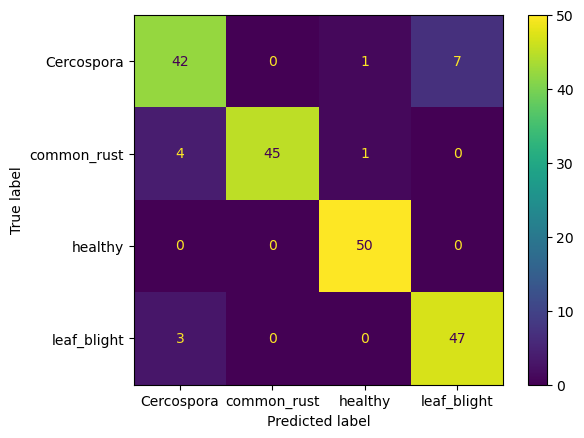

In [17]:
model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\checkpoint\ML Lab\Lab13\E1-cp-0015-loss0.20.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [18]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.86      0.84      0.85        50
 common_rust       1.00      0.90      0.95        50
     healthy       0.96      1.00      0.98        50
 leaf_blight       0.87      0.94      0.90        50

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

